In [13]:
import numpy as np
import matplotlib.pyplot as plt
import quandl
import pandas as pd
import math
import random
import statsmodels
import pandas_datareader
import yfinance as yfin
from pandas_datareader import data as pdr

In [12]:
# !pip install quandl
# !pip install yfinance

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.3/60.3 kB 2.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 502.3/502.3 kB 6.5 MB/s eta 0:00:00a 0:00:01
  Attempting uninstall: pytz
    Found existing installation: pytz 2022.1
    Uninstalling pytz-2022.1:
      Successfully uninstalled pytz-2022.1


In [14]:
yfin.pdr_override()

In [16]:
PG = pdr.get_data_yahoo('PG', start='1995-1-1', end='2023-5-12')
PG

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1995-01-03,15.468750,15.625000,15.437500,15.593750,7.722905,3318400
1995-01-04,15.531250,15.656250,15.312500,15.468750,7.660996,2218800
1995-01-05,15.375000,15.437500,15.218750,15.250000,7.552664,2319600
1995-01-06,15.156250,15.406250,15.156250,15.281250,7.568141,3438000
1995-01-09,15.343750,15.406250,15.187500,15.218750,7.537187,1795200
...,...,...,...,...,...,...
2023-05-05,155.399994,156.309998,154.690002,156.029999,156.029999,3988200
2023-05-08,155.350006,155.729996,154.869995,155.300003,155.300003,4950700
2023-05-09,155.850006,155.979996,153.580002,153.710007,153.710007,4472100


In [8]:
ser = pd.Series(np.random.random(5),name = "Column 01")
ser

0    0.230353
1    0.512041
2    0.630512
3    0.859948
4    0.997158
Name: Column 01, dtype: float64

# Simple Rate of Return

In [17]:
PG['simple_return'] = (PG['Adj Close']/PG['Adj Close'].shift(1))-1
PG['simple_return']

Date
1995-01-03         NaN
1995-01-04   -0.008016
1995-01-05   -0.014141
1995-01-06    0.002049
1995-01-09   -0.004090
                ...   
2023-05-05    0.003344
2023-05-08   -0.004679
2023-05-09   -0.010238
2023-05-10    0.002082
2023-05-11    0.002337
Name: simple_return, Length: 7140, dtype: float64

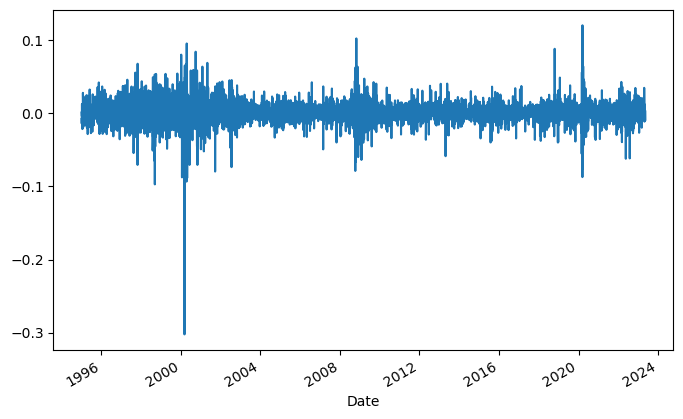

In [18]:
PG['simple_return'].plot(figsize=(8,5))
plt.show()

In [19]:
avg_returns_d =PG['simple_return'].mean()
avg_returns_d

0.0005189510030699138

In [20]:
avg_returns_a =PG['simple_return'].mean()*250
avg_returns_a

0.12973775076747845

In [22]:
print (str(round(avg_returns_a, 5)*100)+ ' %')

12.974 %


In [24]:
tickers = ['PG', 'MSFT', 'F', 'GE']
mydata = pd.DataFrame()
for t in tickers:
    mydata[t] = pdr.get_data_yahoo(t, start='1995-1-1')['Adj Close']

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [25]:
mydata

,PG,MSFT,F,GE
Date,,,,
1995-01-03,7.722904,2.346930,3.921361,25.531641
1995-01-04,7.661001,2.363990,4.026868,25.531641
1995-01-05,7.552661,2.324996,3.991701,25.594219
1995-01-06,7.568138,2.363990,3.991701,25.469053
1995-01-09,7.537184,2.349368,4.062039,25.218754
...,...,...,...,...
2023-05-08,155.300003,308.649994,12.020000,100.919998
2023-05-09,153.710007,307.000000,11.860000,101.000000
2023-05-10,154.029999,312.309998,11.890000,99.540001


<function matplotlib.pyplot.show(close=None, block=None)>

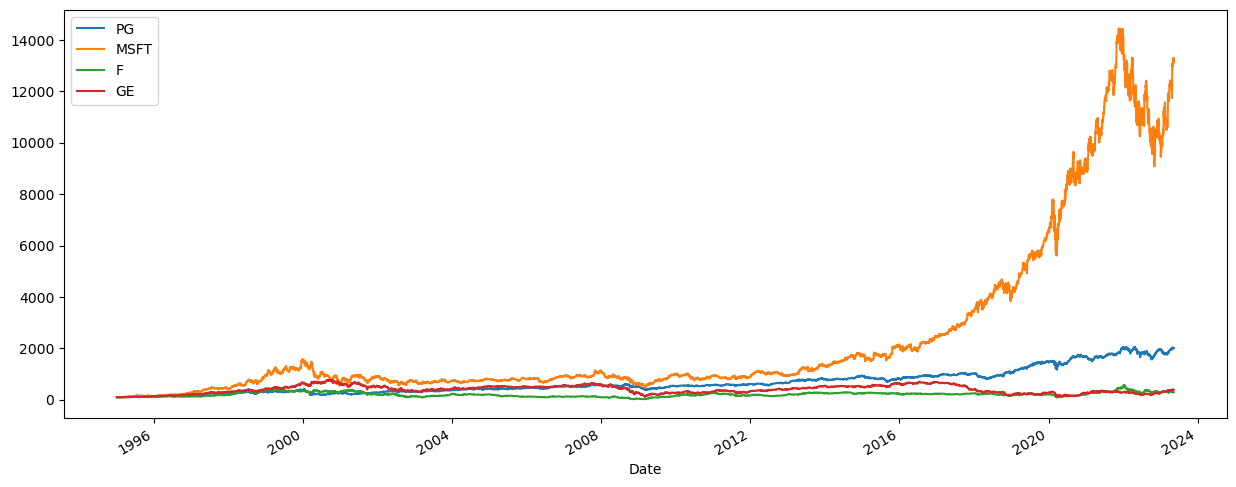

In [26]:
(mydata / mydata.iloc[0]*100).plot(figsize = (15,6));
plt.show

# Calculating the Return of a Portfolio of Securities

In [27]:
returns = (mydata / mydata.shift(1))-1
returns

,PG,MSFT,F,GE
Date,,,,
1995-01-03,NaN,NaN,NaN,NaN
1995-01-04,-0.008015,0.007269,0.026906,0.000000
1995-01-05,-0.014142,-0.016495,-0.008733,0.002451
1995-01-06,0.002049,0.016772,0.000000,-0.004890
1995-01-09,-0.004090,-0.006185,0.017621,-0.009828
...,...,...,...,...
2023-05-08,-0.004679,-0.006438,0.002502,0.006784
2023-05-09,-0.010238,-0.005346,-0.013311,0.000793
2023-05-10,0.002082,0.017296,0.002530,-0.014455


In [28]:
weights = np.array([0.25,0.25,0.25,0.25])

In [30]:
annual_returns = returns.mean()*250
annual_returns

PG      0.130076
MSFT    0.220242
F       0.119196
GE      0.098803
dtype: float64

In [31]:
np.dot(annual_returns,weights)

0.14207936694299922

In [32]:
pfolio_1 = str(round(np.dot(annual_returns,weights), 5)*100)+ ' %'
print(pfolio_1)

14.208000000000002 %


In [33]:
weights_2 = np.array([0.4,0.4,0.15,0.05])
pfolio_2 = str(round(np.dot(annual_returns,weights_2), 5)*100)+ ' %'
print(pfolio_2)

16.295 %


# Calculating the Return of Indices

In [34]:
tickers = ['^GSPC', '^IXIC', '^GDAXI', '^FTSE']
ind_data = pd.DataFrame()
for t in tickers:
    ind_data[t] = pdr.get_data_yahoo(t, start='1995-1-1')['Adj Close']

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [35]:
ind_data

,^GSPC,^IXIC,^GDAXI,^FTSE
Date,,,,
1995-01-03,459.109985,743.580017,2068.919922,3065.699951
1995-01-04,460.709991,745.840027,2072.899902,3051.600098
1995-01-05,460.339996,745.659973,2051.459961,3032.300049
1995-01-06,460.679993,749.690002,2058.199951,3065.000000
1995-01-09,460.829987,752.090027,2053.409912,3055.800049
...,...,...,...,...
2023-05-08,4138.120117,12256.919922,15952.830078,NaN
2023-05-09,4119.169922,12179.549805,15955.480469,7764.100098
2023-05-10,4137.640137,12306.440430,15896.230469,7741.299805


<function matplotlib.pyplot.show(close=None, block=None)>

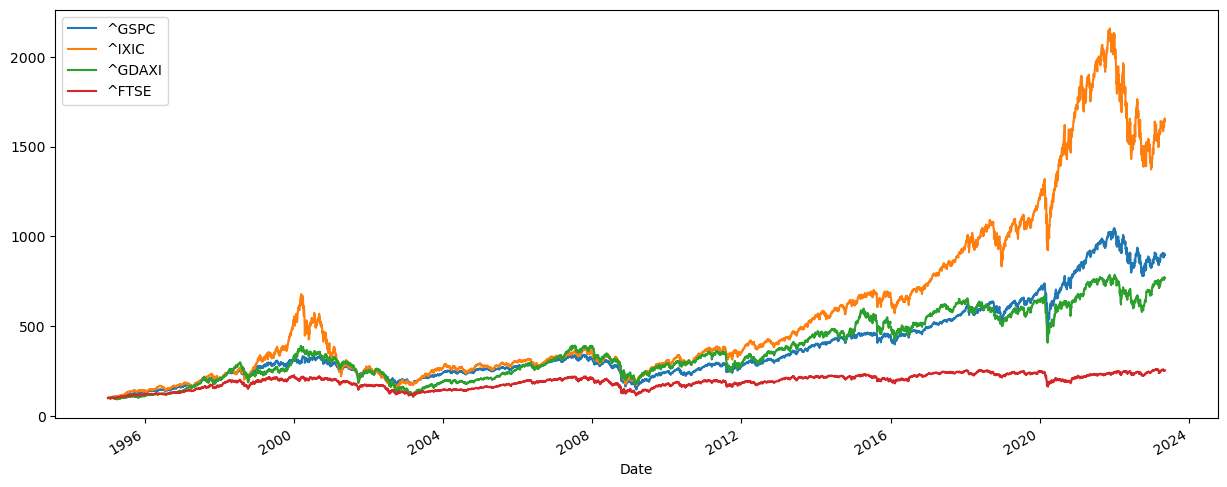

In [36]:
(ind_data / ind_data.iloc[0]*100).plot(figsize = (15,6));
plt.show

In [37]:
ind_returns = (ind_data / ind_data.shift(1))-1
ind_returns

,^GSPC,^IXIC,^GDAXI,^FTSE
Date,,,,
1995-01-03,NaN,NaN,NaN,NaN
1995-01-04,0.003485,0.003039,0.001924,-0.004599
1995-01-05,-0.000803,-0.000241,-0.010343,-0.006325
1995-01-06,0.000739,0.005405,0.003285,0.010784
1995-01-09,0.000326,0.003201,-0.002327,-0.003002
...,...,...,...,...
2023-05-08,0.000452,0.001758,-0.000513,NaN
2023-05-09,-0.004579,-0.006312,0.000166,NaN
2023-05-10,0.004484,0.010418,-0.003713,-0.002937


In [38]:
annual_ind_returns = ind_returns.mean()*250
annual_ind_returns

^GSPC     0.095132
^IXIC     0.128425
^GDAXI    0.085653
^FTSE     0.047357
dtype: float64

In [39]:
tickers = ['PG', '^GSPC', '^DJI']
data_2 = pd.DataFrame()
for t in tickers:
    data_2[t] = pdr.get_data_yahoo(t, start='2003-1-1')['Adj Close']

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


<function matplotlib.pyplot.show(close=None, block=None)>

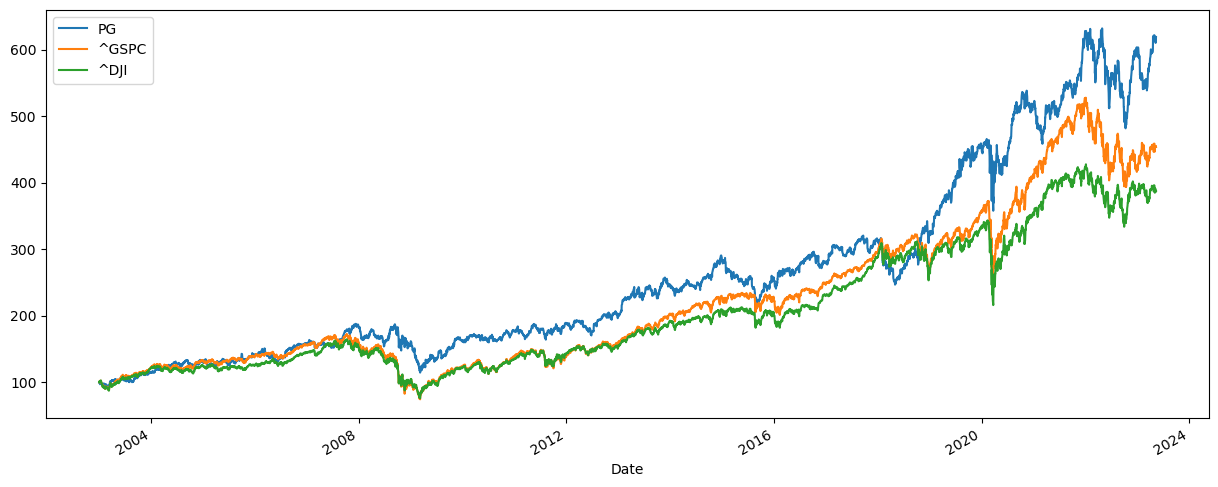

In [40]:
(data_2 / data_2.iloc[0]*100).plot(figsize = (15,6));
plt.show